Challenge_1: Aerial Cactus-AML

In [277]:
# Imports
import pandas as pd
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from PIL import Image
from torch.utils.data import Dataset
import os
import matplotlib.pyplot as plt
import numpy as np

# Phase 1: Loading the data, analyzing it, doing feature engineering and creating the Loader

In [278]:
# Cactus Dataset model
class CactusDataset(Dataset):
    def __init__(self,train='./data/train/train',labels='./data/train.csv',transform=None,target_transform=None):
        if labels is None:
            self.df=None
        else:
            self.df=pd.read_csv(labels)
        self.imgPath=train
        self.transform=transform
        self.target_transform=target_transform
    def __len__(self):
        # here you just need to return a single integer number as the length of your dataset, in your 
        #  case, number of images in your train folder or lines in csv file
        return os.listdir(self.imgPath).__len__()
    def __getitem__(self, idx):
        # this is the most important part, you need to define a code to read images from folder and
        # labels from csv files and return only a pair of (image, class). Note that here, you just 
        # need to consider 1 sample no more. Let say, you have only 1 image in your whole 
        # dataset, the method will work on batches parallely when you pass it to DataLoader class.
        img_path = os.path.join(self.imgPath, os.listdir(self.imgPath)[idx])
        image = Image.open(img_path).convert('RGB')
        if self.df is not None:
            label = self.df['has_cactus'][idx]
        else:
            label = None
        if self.transform:
            image = self.transform(image)
        if self.target_transform is not None and label is not None:
            label = self.target_transform(label)
        return image, label
    
    def label_distribution(self):
        if self.df is not None:
            return self.df['has_cactus'].value_counts().values
        else:
            return np.array([0,0])

In [279]:
# load data for displaying
train_dataset=CactusDataset()
# take the first sample from train_dataloader
train_features, train_labels = train_dataset[0]
image_np = np.array(train_features)
print("Image shape: "+str(image_np.shape))
print("Image python class"+str(type(train_features)))

Image shape: (32, 32, 3)
Image python class<class 'PIL.Image.Image'>


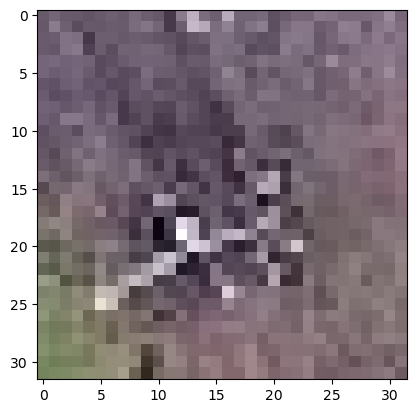

In [280]:
# show the image
plt.imshow(image_np)

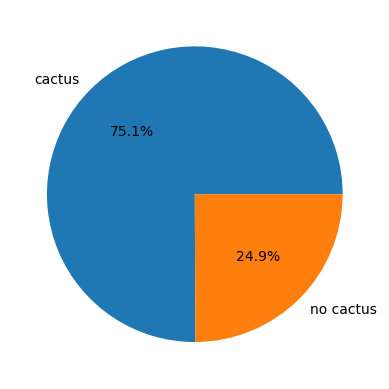

In [281]:
label_distribution = train_dataset.label_distribution()

fig, ax = plt.subplots()
ax.pie(label_distribution, labels=['cactus','no cactus'], autopct='%1.1f%%')
plt.show()

In [282]:
print("Number of train values: "+str(train_dataset.__len__()))

Number of train values: 17500


Image python class<class 'torch.Tensor'>
Image shape: torch.Size([3, 128, 128])


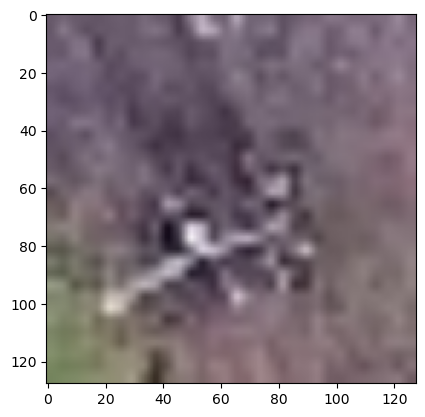

In [283]:
transform = transforms.Compose([
    transforms.Resize((128,128)),
    transforms.ToTensor()
])

train_dataloader = CactusDataset(transform=transform)
image, label = train_dataloader[0]
print("Image python class"+str(type(image)))
print("Image shape: "+str(image.shape))
# show the image
plt.imshow(image.permute(1,2,0))

In [284]:
train_dataloader=DataLoader(train_dataloader,batch_size=32,shuffle=True)

In [285]:
for i, (images, labels) in enumerate(train_dataloader):
    print("Batch number: "+str(i))
    print("Batch images shape: "+str(images.shape))
    print("Batch labels shape: "+str(labels.shape))
    break

Batch number: 0
Batch images shape: torch.Size([32, 3, 128, 128])
Batch labels shape: torch.Size([32])


 # Phase 2: defining the model